In [1]:
# This is to rain and test the YOLOv5 algorithm on Face Mask Wearing dataset.
# Note: the notebooks was run on the "Python 3 (ipykernel)" env. in Azure ML.

# He Zhang, July, 2022

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

Torch: 1.8.1+cu102
Torchvision: 0.9.1+cu102
GPU: 2 Tesla M60


In [6]:
# go to folder YOLOv5
%cd yolov5/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5


In [4]:
%%writefile ./data/mask149yolov5.yaml

# train & val & test sets
path: ../datasets/mask_wearing_dataset # dataset root dir
train: images/train # train images (relative to 'path'), 105 images
val: images/valid # val images (relative to 'path'), 29 images
test: images/test # test images (optional), 15 images

# classe information
nc: 2 # number of classes
names: ["mask", "no-mask"] # class names

Writing ./data/mask149yolov5.yaml


In [7]:
# train
%run -i  train.py --img 672 --batch 20 --epochs 100 --data mask149yolov5.yaml --name exp_mask --weights yolov5s.pt --cache --device 0

train: weights=yolov5s.pt, cfg=, data=mask149yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=20, imgsz=672, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp_mask, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
fatal: unsafe repository ('/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5


Command 'git fetch && git config --get remote.origin.url' returned non-zero exit status 128.


fatal: unsafe repository ('/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5
YOLOv5 🚀 2022-7-15 Python-3.8.5 torch-1.8.1+cu102 CUDA:0 (Tesla M60, 8129MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5 🚀 runs (RECOMMENDED)
TensorBoard: Start with 'tensorboard --logdir runs

      5/99     2.91G   0.08668   0.09264   0.01972        96       672: 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]
                 all         29        162      0.585      0.169     0.0792      0.023

     Epoch   gpu_mem       box       obj       cls    labels  img_size
      6/99     2.91G   0.08522   0.08039   0.01898        54       672: 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]
                 all         29        162      0.558      0.141     0.0573     0.0169

     Epoch   gpu_mem       box       obj       cls    labels  img_size
      7/99     2.91G    0.0887   0.05983   0.01959        38       672: 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]
               Class     Images     Labels          P       

     25/99     2.91G   0.05698   0.07319   0.01568        49       672: 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]
                 all         29        162       0.75      0.292       0.31      0.123

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     26/99     2.91G   0.05546    0.0679   0.01509        75       672: 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]
                 all         29        162      0.276      0.519      0.379      0.152

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     27/99     2.91G   0.05758   0.05627   0.01372        35       672: 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]
               Class     Images     Labels          P       

     45/99     2.91G   0.03822   0.06561  0.007212       161       672: 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]
                 all         29        162      0.907      0.808      0.862      0.505

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     46/99     2.91G   0.03635    0.0436  0.006212        55       672: 100%|██████████| 6/6 [00:02<00:00,  2.48it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]
                 all         29        162      0.858      0.794       0.83      0.424

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     47/99     2.91G   0.04273   0.04714  0.006279        48       672: 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]
               Class     Images     Labels          P       

     65/99     2.91G   0.02953   0.04687  0.002961        37       672: 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]
                 all         29        162      0.835      0.821       0.87      0.542

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     66/99     2.91G   0.02975   0.04166  0.002988        79       672: 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]
                 all         29        162      0.865      0.856      0.889       0.58

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     67/99     2.91G   0.02847   0.04109  0.003048        56       672: 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]
               Class     Images     Labels          P       

     85/99     2.91G   0.02431   0.03753  0.001946        47       672: 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]
                 all         29        162      0.839      0.837      0.897      0.577

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     86/99     2.91G   0.02414   0.03735  0.002686        46       672: 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]
                 all         29        162      0.862      0.822      0.899      0.582

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     87/99     2.91G   0.02574   0.04135  0.002036        62       672: 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]
               Class     Images     Labels          P       

In [3]:
# evaluate
%run -i val.py --weights runs/train/exp_mask_img672_epo300/weights/best.pt --data mask149yolov5.yaml --name exp_mask

val: data=/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5/data/mask149yolov5.yaml, weights=['runs/train/exp_mask_img672_epo300/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp_mask, exist_ok=False, half=False, dnn=False
fatal: unsafe repository ('/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5
YOLOv5 🚀 2022-7-15 Python-3.8.5 torch-1.8.1+cu102 CUDA:0 (Tesla M60, 8129MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 pa

In [8]:
# infer
%run -i detect.py --weights runs/train/exp_mask_img672_epo300/weights/best.pt --source ../datasets/test_images/mask/ --name exp_mask --save-txt --exist-ok --line-thickness 2

detect: weights=['runs/train/exp_mask_img672_epo300/weights/best.pt'], source=../datasets/test_images/mask/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp_mask, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: unsafe repository ('/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5' is owned by someone else)
To add an exception for this directory, call:

	git config --global --add safe.directory /mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-2-tesla-m60/code/Users/zhanghe/cv-safety-detection/yolov5
YOLOv5 🚀 2022-7-15 Python-3.8.5 torch-1.8.1+cu102 CUDA:0 (Tesla M60, 8129MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 

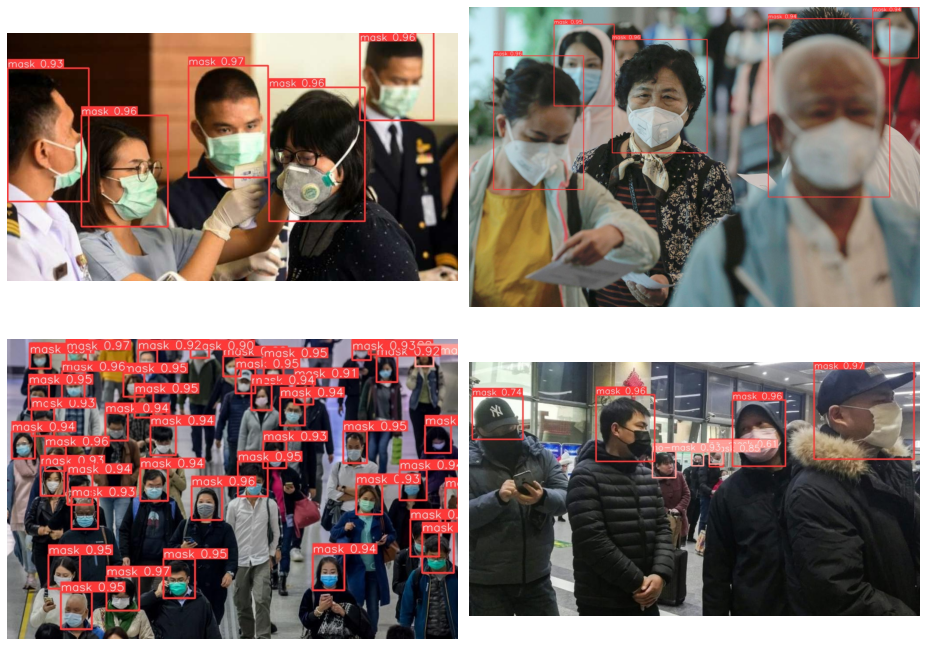

In [9]:
# visualize detection results
bbox_img1 = plt.imread("runs/detect/exp_mask/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg")
bbox_img2 = plt.imread("runs/detect/exp_mask/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg")
bbox_img3 = plt.imread("runs/detect/exp_mask/phplpE73q_jpg.rf.0ab5de066db2a3791b039388014565fe.jpg")
bbox_img4 = plt.imread("runs/detect/exp_mask/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.51ed69bf8d327d93b429a08581f6dea0.jpg")

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.imshow(bbox_img1)
plt.axis("off") 

plt.subplot(2, 2, 2)
plt.imshow(bbox_img2)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(bbox_img3)
plt.axis("off") 

plt.subplot(2, 2, 4)
plt.imshow(bbox_img4)
plt.axis("off")

plt.tight_layout()
plt.show()